In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [21]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train_data.shape

(1460, 81)

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [24]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
#preprossing data
#find missing train and testing data
missing_train_data = train_data.isnull().sum()
missing_test_data = test_data.isnull().sum()
missing_train_data[missing_train_data > 0]
missing_test_data[missing_test_data > 0]
print(missing_train_data)
#print(missing_test_data)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [26]:
# Impute missing values for training data
# numerical features --> use median imputation
numerical_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features_train:
    median_value = train_data[feature].median()
    train_data[feature].fillna(median_value, inplace=True)

#categorical features --> use the most frequent value
categorical_features_train = train_data.select_dtypes(include='object').columns
for feature in categorical_features_train:
    most_frequent_value = train_data[feature].mode()[0]
    train_data[feature].fillna(most_frequent_value, inplace=True)

In [27]:
# Impute missing values for test data
# Exclude 'SalePrice' from numerical features
numerical_features_test = test_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features_test:
    median_value = test_data[feature].median()
    test_data[feature].fillna(median_value, inplace=True)

# For categorical features, use the most frequent value
categorical_features_test = test_data.select_dtypes(include='object').columns
for feature in categorical_features_test:
    most_frequent_value = test_data[feature].mode()[0]
    test_data[feature].fillna(most_frequent_value, inplace=True)

In [28]:
# Drop columns with too many missing values
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train_data.drop(columns=columns_to_drop, axis=1, inplace=True)
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [31]:
#apply correlation
correlation_matrix = train_data.select_dtypes(include=['number']).corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

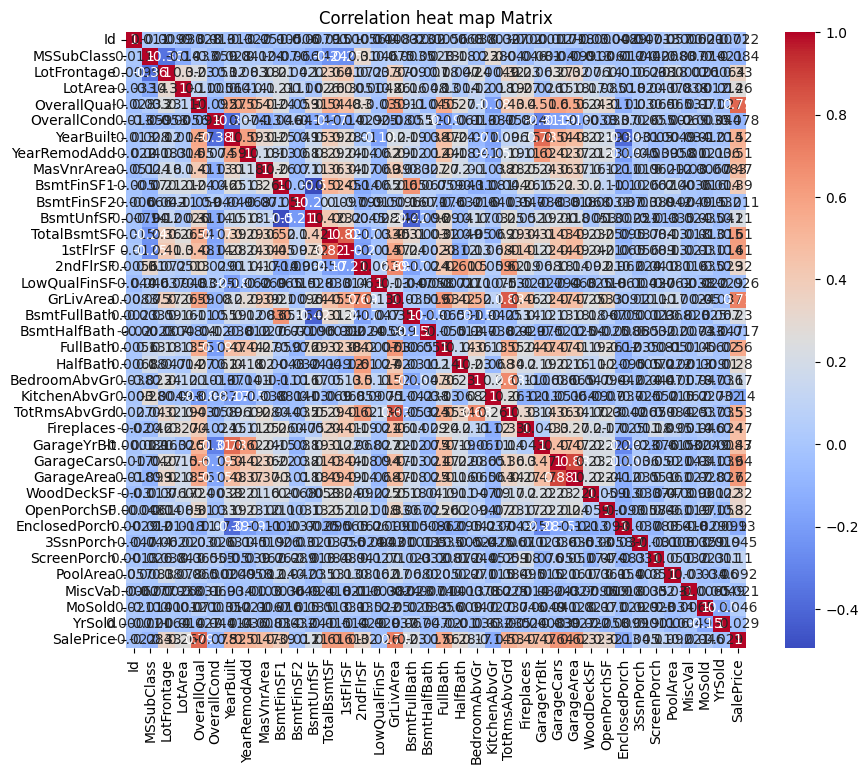

In [32]:
# plot heatmap for corrlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heat map Matrix')
plt.show()

In [33]:
#feature with heighst and lowest corrlation
heighst_corr_feature = correlation_with_target.index[1]
print(heighst_corr_feature)
lowest_corr_feature = correlation_with_target.index[-1]
print(lowest_corr_feature)


OverallQual
KitchenAbvGr


In [34]:
#simple linear reggresion with
x_simple = train_data[heighst_corr_feature].values.reshape(-1, 1)
y_simple = train_data['SalePrice']

In [35]:
simple_model = LinearRegression()
simple_model.fit(x_simple, y_simple)

LinearRegression()

In [36]:
#prediction
simple_prediction = simple_model.predict(x_simple)

In [37]:
#evaluation metric
mse = mean_squared_error(y_simple, simple_prediction)
mae = mean_absolute_error(y_simple, simple_prediction)
r2 = r2_score(y_simple, simple_prediction)

In [39]:
#evaluation metric
mse = mean_squared_error(y_simple, simple_prediction)
mae = mean_absolute_error(y_simple, simple_prediction)
r2 = r2_score(y_simple, simple_prediction) # r2 is calculated here

print(f"Simple Linear Regression R2 Score (accuracy): {r2:.4f}") # Use r2 here
print(f"Simple Linear Regression Mean Absolute Error : {mae:.4f}")
print(f"Simple Linear Regression Mean Squared Error :{mse:.4f}")

Simple Linear Regression R2 Score (accuracy): 0.6257
Simple Linear Regression Mean Absolute Error : 33722.0479
Simple Linear Regression Mean Squared Error :2360934371.5670


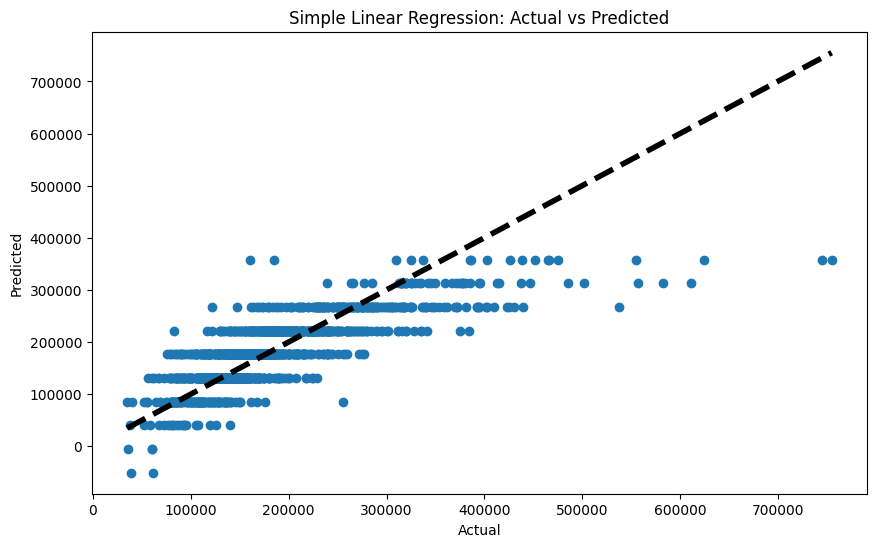

In [41]:
# Plot actual vs predicted for Simple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_simple, simple_prediction) # Use y_simple instead of y
plt.plot([y_simple.min(), y_simple.max()], [y_simple.min(), y_simple.max()], 'k--', lw=4) # Use y_simple here as well
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.show()

In [42]:
#multiple linear regrission
x_multiple = train_data.drop('SalePrice', axis=1)
y_multiple = train_data['SalePrice']

In [44]:
#multiple linear regrission
x_multiple = train_data.drop('SalePrice', axis=1)
y_multiple = train_data['SalePrice']

# Identify columns with non-numeric data
non_numeric_cols = x_multiple.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example using one-hot encoding)
!pip install -q category_encoders
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=non_numeric_cols, use_cat_names=True)
x_multiple_encoded = encoder.fit_transform(x_multiple)

multiple_model = LinearRegression()
multiple_model.fit(x_multiple_encoded, y_multiple)  # Use the encoded data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


LinearRegression()

In [46]:
#prediction
multiple_prediction = multiple_model.predict(encoder.transform(x_multiple)) # Use encoder.transform to encode x_multiple before prediction

In [47]:
#evaluation metric
mse = mean_squared_error(y_multiple, multiple_prediction)
mae = mean_absolute_error(y_multiple, multiple_prediction)
r2 = r2_score(y_multiple, multiple_prediction)

In [50]:
print(f"Multiple Linear Regression R2 Score (accuracy): {r2:.4f}")
print(f"Multiple Linear Regression Mean Absolute Error : {mae:.4f}")

Multiple Linear Regression R2 Score (accuracy): 0.9305
Multiple Linear Regression Mean Absolute Error : 13447.5587


Text(0.5, 1.0, 'Multiple Linear Regression: Actual vs Predicted')

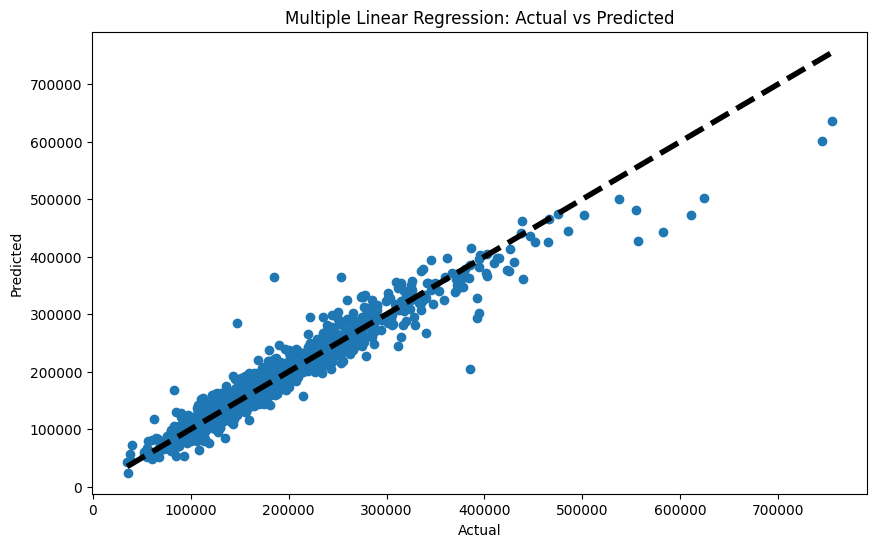

In [52]:
#plotting multiple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_multiple, multiple_prediction) # Use y_multiple instead of y
plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted')

In [54]:
# Import necessary library for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through columns of x_multiple and encode object (string) type columns
for col in x_multiple.columns:
    if x_multiple[col].dtype == 'object':  # Check if column is of object type
        x_multiple[col] = encoder.fit_transform(x_multiple[col])

#lasso model
lasso_model = Lasso()
lasso_model.fit(x_multiple, y_multiple)
lasso_prediction = lasso_model.predict(x_multiple)

In [55]:
#evaluating with lasso metirc
mse = mean_squared_error(y_multiple, lasso_prediction)
mae = mean_absolute_error(y_multiple, lasso_prediction)
r2 = r2_score(y_multiple, lasso_prediction)
mae = mean_absolute_error(y_multiple, lasso_prediction)

In [60]:
print(f"Lasso Regression R2 Score (accuracy): {r2:.4f}")
print(f"Lasso Regression Mean Absolute Error : {mae:.4f}")
print(f"Lasso Regression Mean Squared Error : {mse:.4f}")
# print(f"Lasso Regression Root Mean Squared Error : {rmse:.4f}")

Lasso Regression R2 Score (accuracy): 0.8492
Lasso Regression Mean Absolute Error : 18642.6480
Lasso Regression Mean Squared Error : 951063747.6998


In [61]:
parametars = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [62]:
#lasso with grid search
lasso_grid = GridSearchCV(lasso_model, param_grid=parametars, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(x_multiple, y_multiple)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.108e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.402e+10, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.498e+10, tolerance: 7.706e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [67]:
# Replace lasso_cv with lasso_grid
best_alpha_lasso = lasso_grid.best_params_['alpha']
print(f"Best alpha for Lasso regression: {best_alpha_lasso}")
print(f"Best score for Lasso regression: {-lasso_grid.best_score_}")
print(f"Best estimator for Lasso regression: {lasso_grid.best_estimator_}")
# Assuming you have calculated these metrics using the best estimator
print(f"Lasso Regression with Best Alpha R2 Score (accuracy): {r2:.4f}")
print(f"Lasso Regression with Best Alpha Mean Absolute Error : {mae:.4f}")
print(f"Lasso Regression with Best Alpha Mean Squared Error : {mse:.4f}")
# print(f"Lasso Regression with Best Alpha Root Mean Squared Error : {rmse:.4f}")

Best alpha for Lasso regression: 1000
Best score for Lasso regression: 1203625426.4074726
Best estimator for Lasso regression: Lasso(alpha=1000)
Lasso Regression with Best Alpha R2 Score (accuracy): 0.8492
Lasso Regression with Best Alpha Mean Absolute Error : 18642.6480
Lasso Regression with Best Alpha Mean Squared Error : 951063747.6998


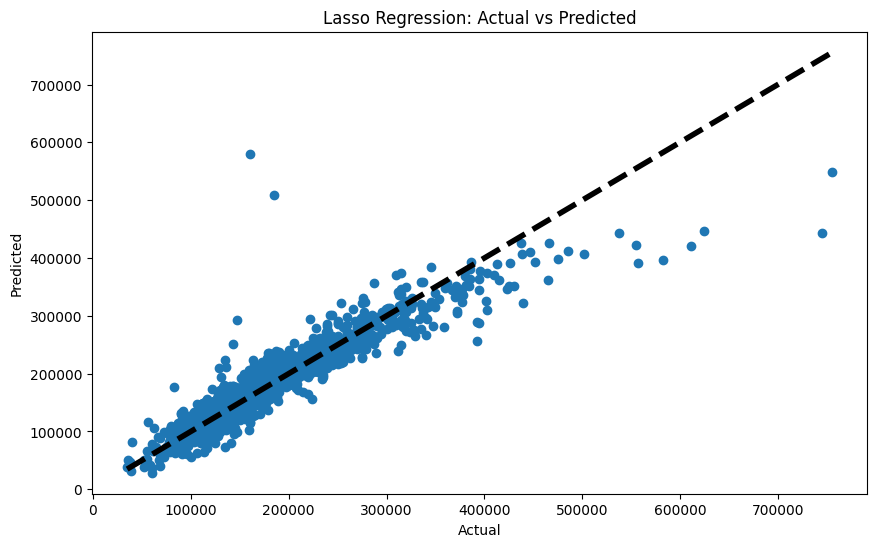

In [72]:
#plotting for lasso regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_multiple, lasso_prediction)  # Assuming y_multiple is your target variable
plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

In [73]:
#evaluating with ridge metric
mse = mean_squared_error(y_multiple, ridge_prediction)
mae = mean_absolute_error(y_multiple, ridge_prediction)
r2 = r2_score(y_multiple, ridge_prediction)
mae = mean_absolute_error(y_multiple, ridge_prediction)

In [76]:
print(f"Ridge Regression with Best Alpha R2 Score (accuracy): {r2:.4f}")
print(f"Ridge Regression with Best Alpha Mean Absolute Error : {mae:.4f}")
print(f"Ridge Regression with Best Alpha Mean Squared Error : {mse:.4f}")
# print(f"Ridge Regression with Best Alpha Root Mean Squared Error : {rmse:.4f}")

Ridge Regression with Best Alpha R2 Score (accuracy): 0.8491
Ridge Regression with Best Alpha Mean Absolute Error : 18652.4457
Ridge Regression with Best Alpha Mean Squared Error : 951557068.8284


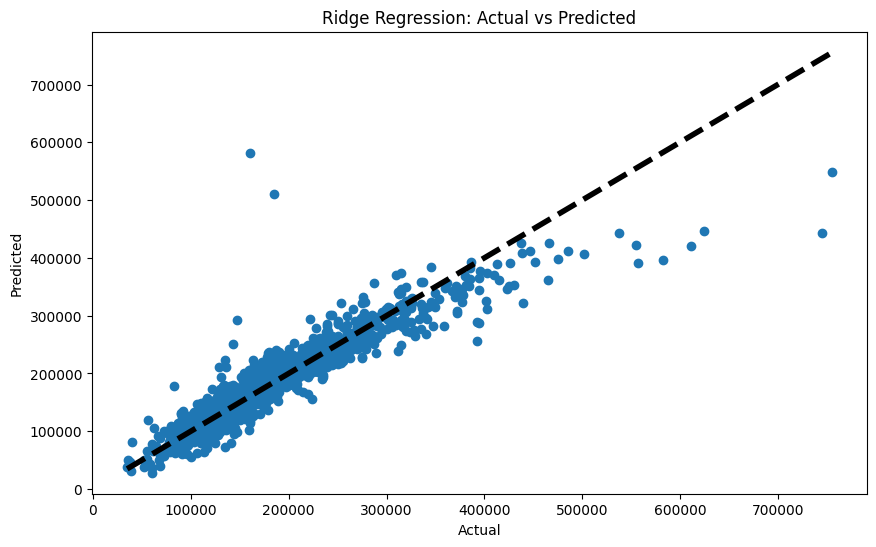

In [78]:
#ploting ridge regrission model
plt.figure(figsize=(10, 6))
# Assuming 'y_multiple' is the correct target variable you used for model evaluation
plt.scatter(y_multiple, ridge_prediction)
plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_multiple)

# Expanded range for hyperparameter tuning
parameters = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'degree': [2, 3, 4],  # for 'poly' kernel
    #'gamma': ['scale', 'auto']  # for 'rbf', 'poly', and 'sigmoid' kernels
}

svm = SVR()
svm_cv = GridSearchCV(svm, parameters, cv=5)
svm_cv.fit(X_scaled, y_multiple)

best_params = svm_cv.best_params_
print(f"Best parameters for SVM: {best_params}")

# Fit SVM with the best parameters
svm_model = SVR(**best_params)
svm_model.fit(X_scaled, y_multiple)


Best parameters for SVM: {'C': 1000, 'epsilon': 1, 'kernel': 'linear'}


SVR(C=1000, epsilon=1, kernel='linear')

In [114]:
 SVM_prediction = svm_model.predict(X_scaled)


In [116]:
#evaluating SVM model
mse = mean_squared_error(y_multiple, SVM_prediction)
mae = mean_absolute_error(y_multiple, SVM_prediction)
r2 = r2_score(y_multiple, SVM_prediction)
mae = mean_absolute_error(y_multiple, SVM_prediction)

In [118]:
print(f"SVM R2 Score (accuracy): {r2:.4f}")
print(f"SVM Mean Absolute Error : {mae:.4f}")
print(f"SVM Mean Squared Error : {mse:.4f}")
# print(f"SVM Root Mean Squared Error : {rmse_svm:.4f}")

SVM R2 Score (accuracy): 0.8314
SVM Mean Absolute Error : 17031.5434
SVM Mean Squared Error : 1063627503.9622


In [121]:
results = {
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','SVM Regression'],
    'MSE': [mse, mse, mse, mse,mse],
    # 'RMSE': [rmse, rmse_lasso, rmse_ridge,rmse_svm],
    'R2 Score': [r2, r2, r2, r2,r2],
    'MAE': [mae, mae, mae, mae,mae]
}

results_df = pd.DataFrame(results)
print(results_df)

                        Model           MSE  R2 Score           MAE
0    Simple Linear Regression  1.063628e+09  0.831352  17031.543416
1  Multiple Linear Regression  1.063628e+09  0.831352  17031.543416
2            Lasso Regression  1.063628e+09  0.831352  17031.543416
3            Ridge Regression  1.063628e+09  0.831352  17031.543416
4              SVM Regression  1.063628e+09  0.831352  17031.543416
